In [3]:
import geopandas as gpd 
import geobr
import matplotlib.pyplot as plt

### Selecionando a base de dados
- primeiro selecionamos a base de dados com a função read_[nome_da_base] por exemplo: read_municipality para importar todos os 

In [5]:
# verificar a lista de dados
geobr.list_geobr()

Function: read_country
Geographies available: Country
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_region
Geographies available: Region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_state
Geographies available: States
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_meso_region
Geographies available: Meso region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_micro_region
Geographies available: Micro region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020

In [11]:
# analise de UCs dos municípios
muni = geobr.read_municipality(code_muni='PA',year=2020)
muni.head()

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,1500107.0,Abaetetuba,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-48.83139 -1.56352, -48.82785 ..."
1,1500131.0,Abel Figueiredo,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-48.5631 -4.8266, -48.54916 -4..."
2,1500206.0,Acará,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-48.30974 -1.47028, -48.29302 ..."
3,1500305.0,Afuá,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-50.50553 0.18421, -50.48764 0..."
4,1500347.0,Água Azul Do Norte,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-50.81162 -6.27576, -50.8069 -..."


<Axes: >

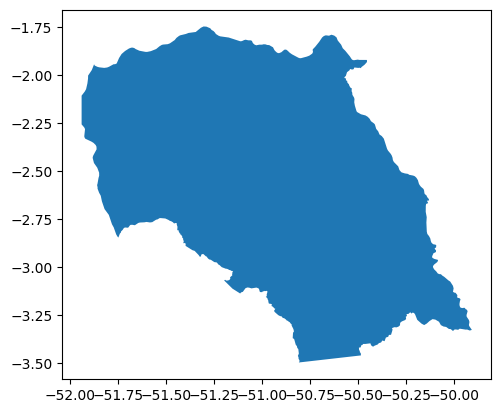

In [13]:
# filtrando a base do município
gdf_muni = muni[muni.name_muni =='Portel']
gdf_muni.plot()

In [16]:
#definindo o sistema de projeção
gdf_muni.crs = "EPSG:4326"
gdf_muni.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [22]:
#Unidades de Concervação
uc_gdf = geobr.read_conservation_units() 
uc_gdf.head()

,code_conservation_unit,name_conservation_unit,id_wcm,category,group,government_level,creation_year,gid7,quality,legislation,dt_ultim10,code_u111,name_organization,date,geometry
0,2350,RESERVA PARTICULAR DO PATRIMÔNIO NATURAL BUGIO...,None,Reserva Particular do Patrimônio Natural,US,estadual,2010,6101,Aproximado (O poligono representa uma estimati...,Outros nº 74-S de 22/02/2010,31/08/2012,0000.32.2350,Instituto Estadual de Meio Ambiente e Recursos...,201909.0,"MULTIPOLYGON (((-40.96875 -20.06128, -40.96906..."
1,3787,AREA DE PROTECAO AMBIENTAL DA BACIA DO CORREGO...,None,Área de Proteção Ambiental,US,municipal,2018,15289,Correto (O poligono corresponde ao memorial de...,Decreto nº 051/2018 de 20/09/2018,20/09/2018,1480.52.3787,Secretaria Municipal de Meio Ambiente de Nova ...,201909.0,"MULTIPOLYGON (((-48.25389 -18.04416, -48.2564 ..."
2,3445,RESERVA PARTICULAR DO PATRIMÔNIO NATURAL PILAR,None,Reserva Particular do Patrimônio Natural,US,estadual,2013,13500,Correto (O poligono corresponde ao memorial de...,Portaria nº 466 de 27/06/2013,10/07/2017,0000.33.3445,Instituto Estadual do Ambiente do Rio de Janeiro,201909.0,"MULTIPOLYGON (((-42.79637 -22.86341, -42.79632..."
3,145,PARQUE NACIONAL DA SERRA DA CAPIVARA,64,Parque,PI,federal,1979,6506,Aproximado (O poligono representa uma estimati...,Decreto nº 83548 de 05/06/1979,27/09/2007,0000.00.0145,Instituto Chico Mendes de Conservação da Biodi...,201909.0,"MULTIPOLYGON (((-42.57484 -8.57399, -42.57355 ..."
4,1754,FLORESTA ESTADUAL DO ARAGUAIA,None,Floresta,US,estadual,2002,2983,Correto (O poligono corresponde ao memorial de...,Decreto nº 5.630 de 07/08/2002,06/08/2009,0000.52.1754,Secretaria Estadual do Meio Ambiente e dos Rec...,201909.0,"MULTIPOLYGON (((-50.58059 -13.21449, -50.57208..."


In [24]:
#definindo o sistema de projeção da UC
uc_gdf.crs = 'EPSG:4326'
uc_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:
#verificando se o SRC das duas bases de dados é igual
gdf_muni.crs == gdf_muni.crs

True

<Axes: >

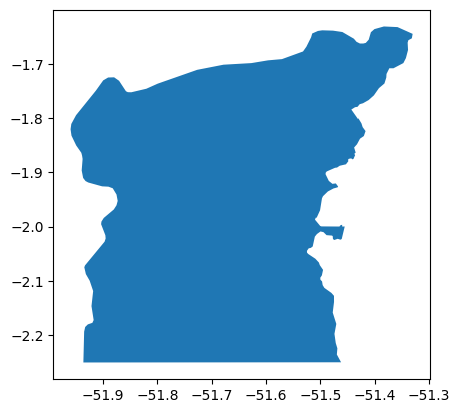

In [27]:
#Filtrando os dados de POA
uc_gdf_poa = gpd.sjoin(uc_gdf,gdf_muni)

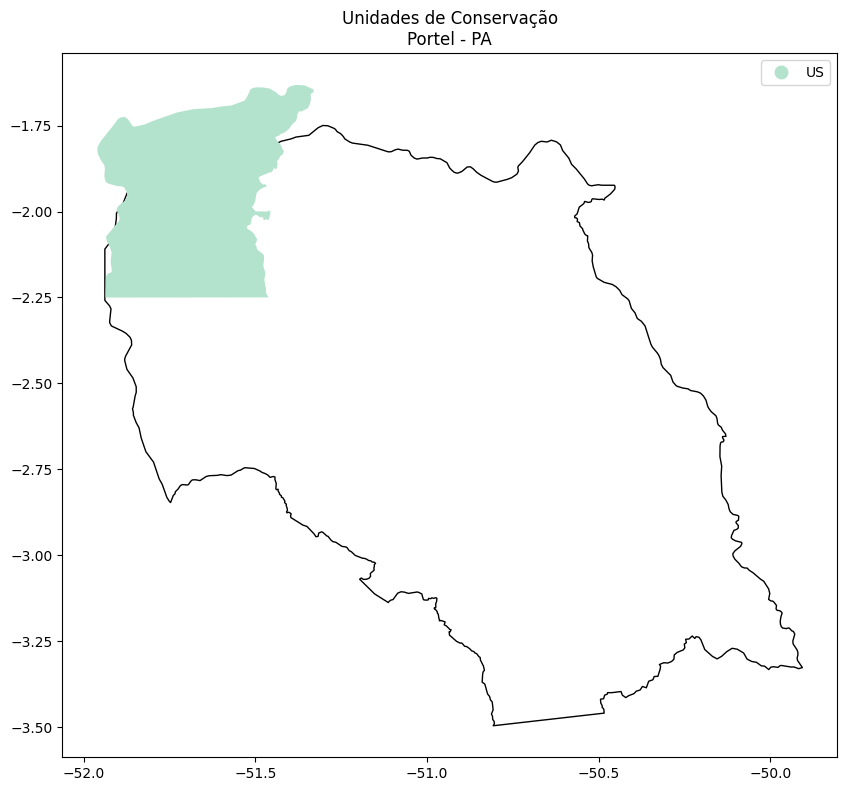

In [29]:
#unidades de conservação
fig,ax = plt.subplots(figsize=(10,10))
base = gdf_muni.plot(ax=ax,color='white',edgecolor='black')
uc_gdf_poa.plot(ax=base,column='group',legend=True,cmap='Pastel2')
ax.set_title("Unidades de Conservação\nPortel - PA")
plt.show()